Christopher Evans

Tensorflow Fourth Codelab: Convolutional Neural Networks
    
https://codelabs.developers.google.com/codelabs/tensorflow-lab4-cnns/#0

In [1]:
# Recalling material form lab 2

# Importing Tensorflow
import tensorflow as tf
# Loading the Fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist
# Creating traning and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# RESHAPING THE IMAGES FOR CONVOLUTION
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
# Normalizing the data (values are between 0 and 1)
training_images = training_images / 255.0
test_images = test_images / 255.0
# Creating the model (turning images into a one dimensional vector, then going through a layer of RELU and softmax)
# ADDING CONVOLUTIONAL AND POOLING LAYERS
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])
# Compiling the model and asking for a report back for loss and accuracy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Training the model
model.fit(training_images, training_labels, epochs=5)
# Recording loss and accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 45s 748us/sample - loss: 0.4428 - acc: 0.8375
Epoch 2/5
60000/60000 [==============================] - 55s 924us/sample - loss: 0.2958 - acc: 0.8905
Epoch 3/5
60000/60000 [==============================] - 59s 978us/sample - loss: 0.2505 - acc: 0.9075
Epoch 4/5
60000/60000 [==============================] - 52s 871us/sample - loss: 0.2185 - acc: 0.9190
Epoch 5/5
10000/10000 [==============================] - 2s 197us/sample - loss: 0.2517 - acc: 0.9074
Test loss: 0.25173106217980384, Test accuracy: 90.74000120162964


In [2]:
# This can be used to summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [3]:
# This shows a sample of the test labels
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


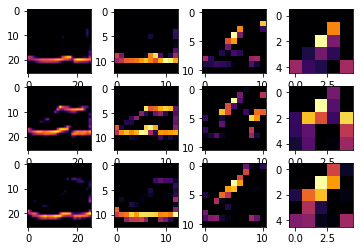

In [5]:
# This will show what teh pictures look like going through the convolutions
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
      f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
      axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
      axarr[0,x].grid(False)
      f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
      axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
      axarr[1,x].grid(False)
      f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
      axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
      axarr[2,x].grid(False)